In [1]:
#Check out http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/#sliders-and-fractals
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy import optimize
    

In [2]:
#make unit circle
npts_fit = 1000
rad_fit = np.arange(npts_fit)*2*np.pi/(npts_fit)
xunit = np.cos(rad_fit)
yunit = np.sin(rad_fit)

#make grid
ngrid = 4
p = (np.arange(ngrid+1)-ngrid/2.)*2./ngrid
q = np.array([-1,1])


## 2-Axis Skew with Symmetric Matrix

Animation with multiple lines plotted using an animation function to return the new position of plotted objects.

In [3]:
fig = plt.figure()
ax1 = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5), aspect='equal')
ngrid = 4
npts = 1000
x_noise = np.random.normal(0,0.05,npts)
y_noise = np.random.normal(0,0.05,npts)

lines = []
#Skew grid lines
for index in range((ngrid+1)*2):
    lobj = ax1.plot([],[],lw=.5,color='b')[0]
    lines.append(lobj)
#circle
lines.append(ax1.plot([],[],lw=1,color='b')[0])

#Norm grid lines
for index in range((ngrid+1)*2):
    lobj = ax1.plot([],[],lw=.5,color='g')[0]
    lines.append(lobj)
#norm circle
lines.append(ax1.plot([],[],lw=1,color='r')[0])

    
def init():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(i):
    iangle = 20-i
    skew = np.array([[np.cos(np.radians(iangle)),np.sin(np.radians(iangle))],
                     [np.sin(np.radians(iangle)),np.cos(np.radians(iangle))]])
    u = np.array([-1,1])
    xlist = []
    ylist = []
    
    p = (np.arange(ngrid+1)-ngrid/2.)*2./ngrid

    for j in p:
        v = np.array([j,j])
        x1 = u*skew[0,0]+v*skew[0,1]
        y1 = u*skew[1,0]+v*skew[1,1]
        xlist.append(x1)
        ylist.append(y1)
        x2 = v*skew[0,0]+u*skew[0,1]
        y2 = v*skew[1,0]+u*skew[1,1]
        xlist.append(x2)
        ylist.append(y2)

    
    xlist.append(xunit*skew[0,0]+yunit*skew[0,1])
    ylist.append(xunit*skew[1,0]+yunit*skew[1,1])
   
    
    for j in p:
        v = np.array([j,j])
        xlist.append(u)
        ylist.append(v)
        xlist.append(v)
        ylist.append(u)
    xlist.append(xunit)
    ylist.append(yunit)
    
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

HTML(anim.to_html5_video())

plt.clf()

## 2-Axis Soft Iron Correction

Animation with multiple lines plotted within the animation function.

In [4]:
# create data
ngrid = 4
npts = 1000
x_noise = np.random.normal(0,0.01,npts)
y_noise = np.random.normal(0,0.01,npts)
rad = np.arange(npts)*2*np.pi/(npts-1)
xunit = np.cos(rad)
yunit = np.sin(rad)
x = np.cos(rad)+x_noise
y = np.sin(rad)+y_noise

# initialization function
fig = plt.figure()
lines = []
def init():
    plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5), aspect='equal')
    iangle = 10
    skew = np.array([[np.cos(np.radians(iangle)),np.sin(np.radians(iangle))],
                     [np.sin(np.radians(iangle)),np.cos(np.radians(iangle))]])
    u = np.array([-1,1])
    lw = 0.3
    for j in p:
        r = np.array([j,j])
        plt.plot(q,r,color='g',linewidth=lw)
        plt.plot(r,q,color='g',linewidth=lw)
        plt.plot(q*skew[0,0]+r*skew[0,1],q*skew[1,0]+r*skew[1,1],color='b',linewidth=lw)
        plt.plot(r*skew[0,0]+q*skew[0,1],r*skew[1,0]+q*skew[1,1],color='b',linewidth=lw)

    plt.scatter(x*skew[0,0]+y*skew[0,1],x*skew[1,0]+y*skew[1,1],s=.3,color='b')
    plt.plot(xunit,yunit,color='r')
    return lines

# animation function
def animate(i):
    if i>10 and i<=50:
        plt.clf()
        plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5), aspect='equal')
        iangle = 10-(i-10)*.25
        skew = np.array([[np.cos(np.radians(iangle)),np.sin(np.radians(iangle))],
                         [np.sin(np.radians(iangle)),np.cos(np.radians(iangle))]])
        u = np.array([-1,1])
        lw = 0.3
        for j in p:
            r = np.array([j,j])
            plt.plot(q,r,color='g',linewidth=lw)
            plt.plot(r,q,color='g',linewidth=lw)
            plt.plot(q*skew[0,0]+r*skew[0,1],q*skew[1,0]+r*skew[1,1],color='b',linewidth=lw)
            plt.plot(r*skew[0,0]+q*skew[0,1],r*skew[1,0]+q*skew[1,1],color='b',linewidth=lw)

        plt.scatter(x*skew[0,0]+y*skew[0,1],x*skew[1,0]+y*skew[1,1],s=.3,color='b')
        plt.plot(xunit,yunit,color='r')
    return lines

# animator        
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=70, interval=70, blit=True)
#filename = 
#anim.save('/Users/andrew/Desktop/deskew.mp4', dpi=350)
HTML(anim.to_html5_video())

plt.clf()

In [5]:
Image(url='https://zippy.gfycat.com/KindMediocreAustralianfreshwatercrocodile.gif')

## Transform Matrices

In [6]:
def transform(trans_mat):
    lw = 0.3
    for i in p:
        r = np.array([i,i])
        plt.plot(q,r,color='g',linewidth=lw)
        plt.plot(r,q,color='g',linewidth=lw)
        plt.plot(q*trans_mat[0,0]+r*trans_mat[0,1],q*trans_mat[1,0]+r*trans_mat[1,1],color='b',linewidth=lw)
        plt.plot(r*trans_mat[0,0]+q*trans_mat[0,1],r*trans_mat[1,0]+q*trans_mat[1,1],color='b',linewidth=lw)

    plt.plot(xunit,yunit,color='g',linewidth=1.5)
    xskew = xunit*trans_mat[0,0]+yunit*trans_mat[0,1]
    yskew = xunit*trans_mat[1,0]+yunit*trans_mat[1,1]
    plt.plot(xskew,yskew,color='b',linewidth=1.5)
    plt.axis('equal')
    plt.show()


### Rotation Matrix

$$
R(\theta) = \left( \begin{array}{cc}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta \end{array} \right)\\
$$

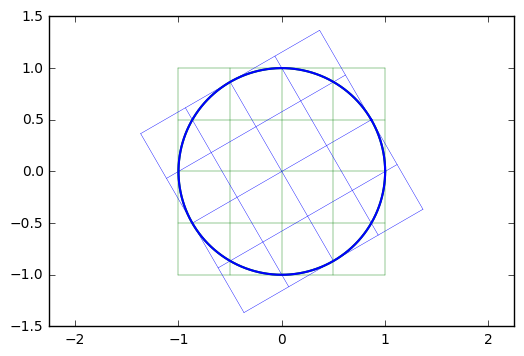

In [7]:
angle = np.radians(30)
skew = np.array([[np.cos(angle),-np.sin(angle)],
                 [np.sin(angle),np.cos(angle)]])

transform(skew)


### Symmetric Matrix

$$
R(\theta) = \left( \begin{array}{cc}
\cos\theta & \sin\theta \\
\sin\theta & \cos\theta \end{array} \right)\\
$$

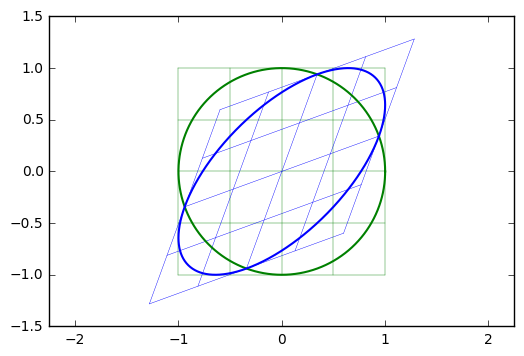

In [8]:
angle = np.radians(20)
skew = np.array([[np.cos(angle),np.sin(angle)],
                 [np.sin(angle),np.cos(angle)]])

transform(skew)


## 3-Axis Hard Iron Correction

In [9]:
# load some test data for demonstration and plot a wireframe
x3, y3, z3 = np.genfromtxt("https://raw.githubusercontent.com/andrewkruger/Magnetometer_calibration/master/3d_soft.txt", unpack=True)
u = np.linspace(0, 2 * np.pi, 21)
v = np.linspace(0, np.pi, 15)
xs = np.outer(np.cos(u), np.sin(v))
ys = np.outer(np.sin(u), np.sin(v))
zs = np.outer(np.ones(np.size(u)), np.cos(v))


In [10]:
# 3-axis hard iron and gain calibration
def calc_params3(xc, yc, zc, xm, ym, zm):
    return (((x3-xc)/xm)**2 + ((y3-yc)/ym)**2 + ((z3-zc)/zm)**2)    
    
def lq_function3(c):
    fit = calc_params3(*c)
    return fit - 1

# parameter estimates
x3_cen = (x3.max()+x3.min())/2.
y3_cen = (y3.max()+y3.min())/2.
z3_cen = (z3.max()+z3.min())/2.
x3_mag = (x3.max()-x3.min())/2.
y3_mag = (y3.max()-y3.min())/2.
z3_mag = (z3.max()-z3.min())/2.

# fit data
params3_estimate = x3_cen, y3_cen, z3_cen, x3_mag, y3_mag, z3_mag
params3, ier = optimize.leastsq(lq_function3, params3_estimate)
xc_3, yc_3, zc_3, xm_3, ym_3, zm_3 = params3

# calibrate data
x3_hcal = (x3-xc_3)/xm_3
y3_hcal = (y3-yc_3)/ym_3
z3_hcal = (z3-zc_3)/zm_3

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', axisbg = 'white')
ax._axis3don = False
fig.tight_layout(pad=-10)

ax.set_aspect('equal')
ax.autoscale_view(tight=True)
ax.scatter(x3_hcal, y3_hcal, z3_hcal, s=1, color='b')
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, color='b', alpha=0.08)

# initialization function
def init():
    return ()

# animation function
def animate(i):
    print i
    ax.view_init(np.sin(i*np.pi/100)*30, i*3.6/2)
    return ()

# animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=70, blit=True)

#filename = 
#anim.save(filename, dpi=350)
#HTML(anim.to_html5_video())
plt.clf()

In [11]:
display(Image(url='https://giant.gfycat.com/PolishedTemptingGopher.gif'))

## 3-Axis Soft Iron Correction

In [12]:
# 3-axis symmetric matrix calibration function
def calc_params3_soft(x_ct, y_ct, z_ct, x_mt, y_mt, z_mt, xy_mt, xz_mt, yz_mt):
    xcen, ycen, zcen = x3-x_ct, y3-y_ct, z3-z_ct
    xscale = xcen*x_mt+ycen*xy_mt+zcen*xz_mt
    yscale = xcen*xy_mt+ycen*y_mt+zcen*yz_mt
    zscale = xcen*xz_mt+ycen*yz_mt+zcen*z_mt
    return np.sqrt(xscale**2+yscale**2+zscale**2)
    
def lq_function3_soft(c):
    fit = calc_params3_soft(*c)
    return fit - 1

params3_est_soft = x3_cen, y3_cen, z3_cen, 1/x3_mag, 1/y3_mag, 1/z3_mag, .0001, .0001, .0001
params3, ier = optimize.leastsq(lq_function3_soft, params3_est_soft)
xc_3, yc_3, zc_3, xm_3, ym_3, zm_3, xym, xzm, yzm = params3

# results from fit
m = np.array([[xm_3, xym, xzm],
              [xym, ym_3, yzm],
              [xzm, yzm, zm_3]])
A = np.linalg.inv(m)

# calibrate data
x3cen = (x3-xc_3)
y3cen = (y3-yc_3)
z3cen = (z3-zc_3)
x3_scal = x3cen*m[0][0]+y3cen*m[0][1]+z3cen*m[0][2]
y3_scal = x3cen*m[1][0]+y3cen*m[1][1]+z3cen*m[1][2]
z3_scal = x3cen*m[2][0]+y3cen*m[2][1]+z3cen*m[2][2]

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', axisbg = 'white')
ax._axis3don = False
fig.tight_layout(pad=-10)

ax.set_aspect('equal')
ax.autoscale_view(tight=True)
ax.scatter(x3_scal, y3_scal, z3_scal, s=1, color='b')
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, color='b', alpha=0.08)

# initialization function
def init():
    return ()

# animation function
def animate(i):
    ax.view_init(np.sin(i*np.pi/100)*30, i*3.6/2)
    return ()

# animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=50, blit=True)

#filename = 
#anim.save(filename, dpi=350)
#HTML(anim.to_html5_video())
plt.clf()

In [13]:
display(Image(url='https://giant.gfycat.com/ImpossibleDeepDobermanpinscher.gif'))